# INPE Downloader

## Time Series

With the basic functions to open files and create cube, it is pretty straight forward to create a time series from these data. For that, we have another helper function, called `cut_cube_by_geoms` that receives a DataArray and GeoPandas GeoSeries. 

In [9]:
%load_ext autoreload
%autoreload 2

import geopandas as gpd
import xarray as xr
from mergedownloader.downloader import Downloader
from mergedownloader.inpeparser import INPEParsers, INPETypes
from mergedownloader.utils import GISUtil

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# set the download folder
# download_folder = '../tmp'
download_folder = '/workspaces/reports_folder/downloads/'

In [4]:
# create a downloader instance
downloader = Downloader(
    server=INPEParsers.FTPurl, 
    parsers=INPEParsers.parsers,
    local_folder=download_folder,
)


In [5]:
# Create a cube of monthly rain
cube = downloader.create_cube(
    start_date='2022-01',
    end_date='2022-12',
    datatype=INPETypes.MONTHLY_ACCUM_YEARLY
)

In [6]:
cube

<xarray.DataArray 'pacum' (time: 12, latitude: 691, longitude: 474)>
array([[[166.875 , 169.875 , 168.5625, ...,  67.5625,  64.0625,
          63.    ],
        [173.125 , 164.8125, 165.6875, ...,  61.5625,  60.3125,
          60.375 ],
        [166.5625, 166.125 , 170.75  , ...,  58.875 ,  57.6875,
          56.75  ],
        ...,
        [ 28.625 ,  24.0625,  21.3125, ...,  52.0625,  52.375 ,
          48.6875],
        [ 22.6875,  21.125 ,  20.5   , ...,  51.875 ,  48.75  ,
          43.5   ],
        [ 26.625 ,  19.125 ,  18.4375, ...,  47.8125,  47.25  ,
          38.4375]],

       [[210.5625, 209.1875, 213.375 , ...,  82.0625,  78.125 ,
          78.375 ],
        [198.5   , 201.8125, 205.0625, ...,  83.0625,  81.9375,
          76.625 ],
        [192.    , 192.3125, 201.9375, ...,  83.5   ,  80.1875,
          81.125 ],
...
        [296.25  , 333.8125, 370.8125, ...,  43.75  ,  48.25  ,
          39.875 ],
        [308.4375, 318.8125, 341.5   , ...,  46.625 ,  53.125 ,
          44.25  ],
        [323.875 , 326.0625, 335.9375, ...,  43.25  ,  34.125 ,
          30.625 ]],

       [[137.5625, 138.5625, 141.4375, ...,  74.625 ,  74.6875,
          75.25  ],
        [141.4375, 142.5625, 149.    , ...,  74.8125,  70.6875,
          69.25  ],
        [143.3125, 147.4375, 150.1875, ...,  74.25  ,  67.8125,
          64.75  ],
        ...,
        [ 25.1875,  21.625 ,  18.875 , ...,   1.75  ,   1.375 ,
           1.8125],
        [ 26.5   ,  24.625 ,  18.75  , ...,   1.25  ,   1.625 ,
           2.625 ],
        [ 21.9375,  21.5   ,  21.875 , ...,   1.0625,   2.0625,
           2.3125]]], dtype=float32)
Coordinates:
  * longitude    (longitude) float64 -81.95 -81.85 -81.75 ... -34.75 -34.65
  * latitude     (latitude) float64 -56.15 -56.05 -55.95 ... 12.65 12.75 12.85
  * time         (time) datetime64[ns] 2022-01-01T12:00:00 ... 2022-12-01T12:...
    spatial_ref  int64 0

In [7]:
# open the shapefile with brazilian states
brazil = gpd.read_file('../data/states/')
brazil.head(3)

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,AREA_KM2,geometry
0,12,Acre,AC,Norte,164173.429,"POLYGON ((-68.79282 -10.99957, -68.79367 -10.9..."
1,13,Amazonas,AM,Norte,1559255.881,"POLYGON ((-56.76292 -3.23221, -56.76789 -3.242..."
2,15,Pará,PA,Norte,1245870.704,"MULTIPOLYGON (((-48.97548 -0.19834, -48.97487 ..."


In [10]:
# perform the cutting
br_cube = GISUtil.cut_cube_by_geoms(cube, brazil.geometry)

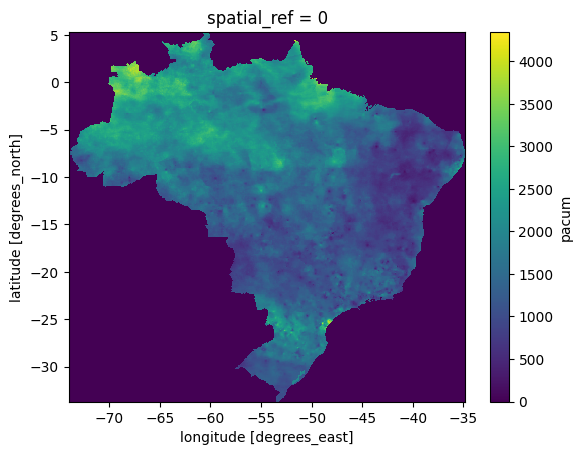

In [11]:
br_cube.sum(dim='time').plot()

## Get the time series

If instead, we want to calculate a time series, we can just use another helper function called `get_time_series` that will apply an aggregation function to latitude and longitude and return a Pandas TimeSeries.

In [12]:
ts = Downloader.get_time_series(
    cube=cube,
    shp=brazil,
    reducer=xr.DataArray.mean,
    keep_dim='time'
)

Coverting shp CRS to EPSG:4326


Text(0, 0.5, 'Monthly rain in mm')

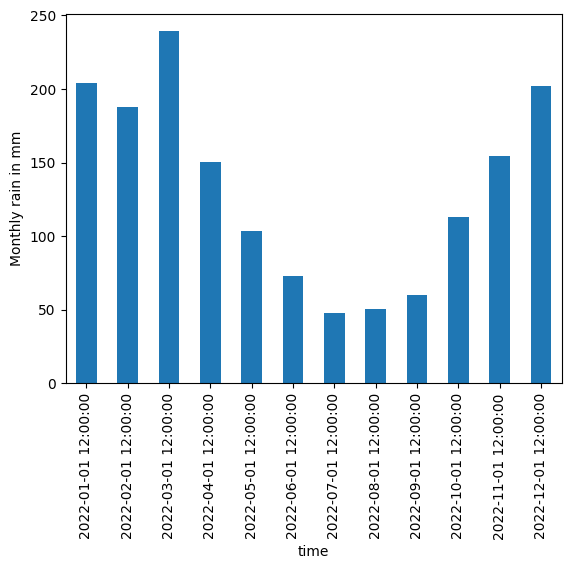

In [13]:
ax = ts.plot(kind='bar')
ax.set_ylabel('Monthly rain in mm')

## Year Accumulated

Another data that is available at INPE is the rain accumulated in a year.
This is done by accumulating the rain every day, like so:<br>
MERGE_CPTEC_acum_2022.nc=(prec_01jan2022+...+prec_31dec2022)

In [14]:
cube = downloader.create_cube(
    start_date='2001',
    end_date='2022',
    datatype=INPETypes.YEARLY_ACCUM
)
cube

<xarray.DataArray 'pacum' (time: 22, latitude: 691, longitude: 474)>
array([[[1768.9375, 1753.4375, 1751.3125, ...,  738.875 ,  724.875 ,
          724.3125],
        [1786.875 , 1749.9375, 1760.9375, ...,  744.1875,  748.3125,
          731.8125],
        [1799.25  , 1787.8125, 1777.6875, ...,  760.125 ,  765.75  ,
          759.625 ],
        ...,
        [2406.625 , 2218.625 , 2036.375 , ..., 1100.875 , 1028.25  ,
          977.5   ],
        [2490.625 , 2310.3125, 2163.125 , ..., 1027.75  ,  965.    ,
          885.875 ],
        [2524.1875, 2371.625 , 2168.875 , ..., 1014.75  ,  938.375 ,
          896.125 ]],

       [[1431.1875, 1435.9375, 1460.6875, ...,  696.4375,  706.1875,
          723.0625],
        [1460.875 , 1466.5   , 1462.125 , ...,  694.1875,  697.25  ,
          709.6875],
        [1483.8125, 1486.0625, 1456.0625, ...,  686.1875,  694.0625,
          708.0625],
...
        [1395.375 , 1309.875 , 1315.3125, ...,  581.6875,  593.0625,
          586.8125],
        [1372.9375, 1287.0625, 1236.375 , ...,  571.25  ,  557.3125,
          580.5625],
        [1351.1875, 1213.0625, 1161.625 , ...,  546.875 ,  556.    ,
          568.1875]],

       [[1651.    , 1661.125 , 1661.375 , ..., 1174.1875, 1165.1875,
         1154.5625],
        [1672.125 , 1662.625 , 1671.0625, ..., 1161.4375, 1173.625 ,
         1137.9375],
        [1659.875 , 1670.0625, 1674.0625, ..., 1168.375 , 1141.6875,
         1125.0625],
        ...,
        [2714.0625, 2729.75  , 2668.75  , ...,  811.0625,  808.875 ,
          834.625 ],
        [2768.4375, 2714.25  , 2592.75  , ...,  707.5   ,  767.4375,
          787.625 ],
        [2712.    , 2646.0625, 2579.625 , ...,  612.25  ,  641.125 ,
          668.6875]]], dtype=float32)
Coordinates:
  * longitude    (longitude) float64 -81.95 -81.85 -81.75 ... -34.75 -34.65
  * latitude     (latitude) float64 -56.15 -56.05 -55.95 ... 12.65 12.75 12.85
  * time         (time) datetime64[ns] 2001-01-01 2002-01-01 ... 2022-01-01
    spatial_ref  int64 0

In [15]:
cube.rio.crs

CRS.from_epsg(4326)

In [16]:
ts = Downloader.get_time_series(
    cube=cube,
    shp=brazil,
    reducer=xr.DataArray.mean,
    keep_dim='time'
)

Coverting shp CRS to EPSG:4326


(1200.0, 1800.0)

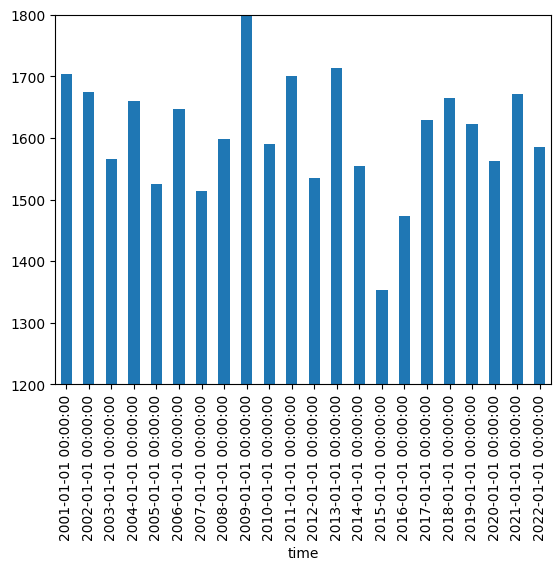

In [18]:
ax = ts.plot(kind='bar')
ax.set_ylim([1200, 1800])

## Yearly rain adjusted by the Hydrological period

One important information is regarding the rain within a hydrological period, that can change depending on the basin to be considered. For that, we are going to rely on the MONTHLY_ACCUM_YEARLY and create the rain in the Hydrological year <b>on-demand</b>.

The fundamental method that will be used to perform this task is the `accum_rain()`.

In [20]:
rain1 = downloader.accum_rain(
    start_date='2022-01',
    end_date='2022-03',
    datatype=INPETypes.MONTHLY_ACCUM_YEARLY,
)


In [21]:
rain1

<xarray.DataArray 'pacum' (latitude: 691, longitude: 474)>
array([[521.3125, 523.25  , 528.6875, ..., 272.75  , 267.5625, 262.6875],
       [520.8125, 514.375 , 522.375 , ..., 276.6875, 273.6875, 261.25  ],
       [511.    , 514.4375, 530.1875, ..., 293.5   , 275.    , 277.    ],
       ...,
       [ 82.75  ,  85.875 ,  78.5625, ...,  58.3125,  56.0625,  53.4375],
       [ 84.125 ,  86.125 ,  82.375 , ...,  56.4375,  51.5625,  46.75  ],
       [ 96.875 ,  87.75  ,  78.75  , ...,  55.4375,  54.4375,  44.8125]],
      dtype=float32)
Coordinates:
  * longitude    (longitude) float64 -81.95 -81.85 -81.75 ... -34.75 -34.65
  * latitude     (latitude) float64 -56.15 -56.05 -55.95 ... 12.65 12.75 12.85
    spatial_ref  int64 0
    time         datetime64[ns] 2022-01-01T12:00:00

Now, to accumulate it in customized periods, we can pass all the periods as tuples (start, end) in a list. Each period will be accumulated and they will be concatenated to create a cube. 

In [22]:
periods = [('2022-01','2022-03'), ('2022-04','2022-06')]
cube = downloader.accum_periodically_rain(
    periods = periods,
    data_type=INPETypes.MONTHLY_ACCUM_YEARLY
)

In [23]:
cube

<xarray.DataArray 'pacum' (time: 2, latitude: 691, longitude: 474)>
array([[[ 521.3125,  523.25  ,  528.6875, ...,  272.75  ,  267.5625,
          262.6875],
        [ 520.8125,  514.375 ,  522.375 , ...,  276.6875,  273.6875,
          261.25  ],
        [ 511.    ,  514.4375,  530.1875, ...,  293.5   ,  275.    ,
          277.    ],
        ...,
        [  82.75  ,   85.875 ,   78.5625, ...,   58.3125,   56.0625,
           53.4375],
        [  84.125 ,   86.125 ,   82.375 , ...,   56.4375,   51.5625,
           46.75  ],
        [  96.875 ,   87.75  ,   78.75  , ...,   55.4375,   54.4375,
           44.8125]],

       [[ 421.625 ,  428.25  ,  433.3125, ...,  293.    ,  294.5625,
          297.1875],
        [ 440.0625,  438.875 ,  440.5   , ...,  290.875 ,  300.3125,
          296.5   ],
        [ 432.625 ,  448.625 ,  451.9375, ...,  283.4375,  286.5   ,
          279.5625],
        ...,
        [1101.6875, 1129.5   , 1114.125 , ...,   15.    ,   15.125 ,
           16.4375],
        [1170.75  , 1163.1875, 1133.1875, ...,   13.75  ,   14.625 ,
           15.125 ],
        [1114.375 , 1079.    , 1075.6875, ...,    9.    ,    8.75  ,
           10.375 ]]], dtype=float32)
Coordinates:
  * longitude    (longitude) float64 -81.95 -81.85 -81.75 ... -34.75 -34.65
  * latitude     (latitude) float64 -56.15 -56.05 -55.95 ... 12.65 12.75 12.85
    spatial_ref  int64 0
  * time         (time) datetime64[ns] 2022-01-01T12:00:00 2022-04-01T12:00:00

To create the periods automatically, we can use the DateProcessor, like so:

In [27]:
from mergedownloader.utils import DateProcessor

# Yearly example
DateProcessor.create_monthly_periods(
    start_date = '2012-10-01',
    end_date = '2022-10-01',
    month_step = 12,
)

[(datetime.datetime(2012, 10, 1, 0, 0), datetime.datetime(2013, 9, 1, 0, 0)),
 (datetime.datetime(2013, 10, 1, 0, 0), datetime.datetime(2014, 9, 1, 0, 0)),
 (datetime.datetime(2014, 10, 1, 0, 0), datetime.datetime(2015, 9, 1, 0, 0)),
 (datetime.datetime(2015, 10, 1, 0, 0), datetime.datetime(2016, 9, 1, 0, 0)),
 (datetime.datetime(2016, 10, 1, 0, 0), datetime.datetime(2017, 9, 1, 0, 0)),
 (datetime.datetime(2017, 10, 1, 0, 0), datetime.datetime(2018, 9, 1, 0, 0)),
 (datetime.datetime(2018, 10, 1, 0, 0), datetime.datetime(2019, 9, 1, 0, 0)),
 (datetime.datetime(2019, 10, 1, 0, 0), datetime.datetime(2020, 9, 1, 0, 0)),
 (datetime.datetime(2020, 10, 1, 0, 0), datetime.datetime(2021, 9, 1, 0, 0)),
 (datetime.datetime(2021, 10, 1, 0, 0), datetime.datetime(2022, 9, 1, 0, 0))]

In [28]:
# By semesters
DateProcessor.create_monthly_periods(
    start_date = '2012-10',
    end_date = '2013-10',
    month_step = 6,
)

[(datetime.datetime(2012, 10, 26, 0, 0), datetime.datetime(2013, 3, 26, 0, 0)),
 (datetime.datetime(2013, 4, 26, 0, 0), datetime.datetime(2013, 9, 26, 0, 0))]

In [29]:
# Quarterly
DateProcessor.create_monthly_periods(
    start_date = '2012-01',
    end_date = '2012-12',
    month_step = 3,
)

[(datetime.datetime(2012, 1, 26, 0, 0), datetime.datetime(2012, 3, 26, 0, 0)),
 (datetime.datetime(2012, 4, 26, 0, 0), datetime.datetime(2012, 6, 26, 0, 0)),
 (datetime.datetime(2012, 7, 26, 0, 0), datetime.datetime(2012, 9, 26, 0, 0)),
 (datetime.datetime(2012, 10, 26, 0, 0),
  datetime.datetime(2012, 12, 26, 0, 0))]

Now, accumulating it for every year...


In [30]:
periods = DateProcessor.create_monthly_periods(
    start_date = '2001-10',
    end_date = '2022-10',
    month_step = 12,
)

In [31]:
cube = downloader.accum_periodically_rain(
    periods=periods,
    data_type=INPETypes.MONTHLY_ACCUM_YEARLY
)

In [32]:
ts = Downloader.get_time_series(
    cube=cube,
    shp=brazil,
    reducer=xr.DataArray.mean,
    keep_dim='time'
)

Coverting shp CRS to EPSG:4326


(1200.0, 1800.0)

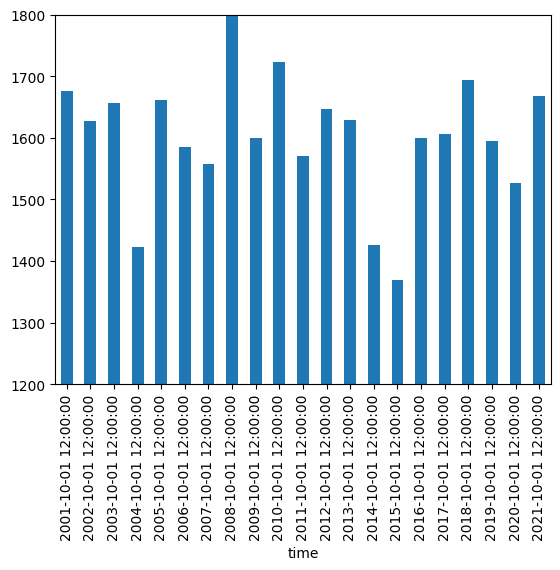

In [33]:
ax = ts.plot(kind='bar')
ax.set_ylim([1200, 1800])